## CAPSTONE PROJECT - CLUSTERING

#### IMPORT PACKAGES

In [2]:
# connect colab ke g drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# import package
import os
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Package untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Membuat path untuk mengidentifikasi letak directory
# Catatan : pastikan path yang anda masukkan sesuai dengan directory data anda. Kemungkinan besar path di contoh ini berbeda dengan penyimpanan data anda
path = '/content/gdrive/MyDrive/NARASIO/JUNIOR DATA SCIENTIST/MEET 5 CAPSTONE PROJECT/'

# Cek directory
os.listdir(path)

['credit_card_user_segmentation.csv',
 'CAPSTONE PROJECT_FINAL DESIGN.pptx',
 'Template',
 'CAPSTONE DHANANJAYA Clustering.ipynb']

#### READ DATASET

In [5]:
# Load data
credit_card_data = pd.read_csv(os.path.join(path, "credit_card_user_segmentation.csv"))
credit_card_data.head()

,Cust_ID,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### PROBLEM STATEMENT



1.   Bagaimana mengelompokkan customer pengguna kartu kredit berdasarkan data dan variabel-variabel yang ada ?
2.   Kita bisa mengelompokkan customer menjadi berapa kelompok ?
3.   Setiap kelompok mempunyai karakteristik apa ?
4.   Saran dan kesimpulan apa yang bisa kita terapkan untuk masing-masing kelompok tersebut ?



#### EDA

In [6]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cust_ID                        8950 non-null   object 
 1   Saldo                          8950 non-null   float64
 2   Frekuensi_Saldo                8950 non-null   float64
 3   Pembelian                      8950 non-null   float64
 4   Pembelian_Satu_Kali            8950 non-null   float64
 5   Pembelian_Angsuran             8950 non-null   float64
 6   Uang_Dibayar_Dimuka            8950 non-null   float64
 7   Frekuensi_Pembelian            8950 non-null   float64
 8   Frekuensi_Pembelian_Satu_Kali  8950 non-null   float64
 9   Frekuensi_Pembelian_Angsuran   8950 non-null   float64
 10  Frekuensi_Uang_Dibayar_Dimuka  8950 non-null   float64
 11  Transaksi_Uang_Dibayar_Dimuka  8950 non-null   int64  
 12  Transaksi_Pembelian            8950 non-null   i

In [ ]:
credit_card_data.describe()

,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
credit_card_data.shape

(8950, 18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

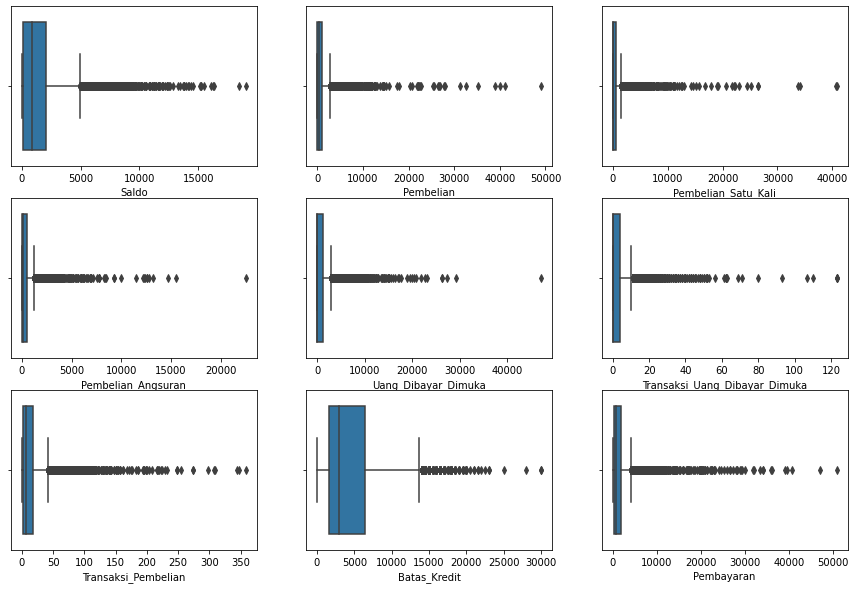

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(331) #1 = jumlah baris dlm 1 kanvas, #2= jumlah kolom dalam 1 kanvas, #1 = urutan tampilan
sns.boxplot(credit_card_data['Saldo'])
plt.subplot(332)
sns.boxplot(credit_card_data['Pembelian'])
plt.subplot(333)
sns.boxplot(credit_card_data['Pembelian_Satu_Kali'])
plt.subplot(334)
sns.boxplot(credit_card_data['Pembelian_Angsuran'])
plt.subplot(335)
sns.boxplot(credit_card_data['Uang_Dibayar_Dimuka'])
plt.subplot(336)
sns.boxplot(credit_card_data['Transaksi_Uang_Dibayar_Dimuka'])
plt.subplot(337)
sns.boxplot(credit_card_data['Transaksi_Pembelian'])
plt.subplot(338)
sns.boxplot(credit_card_data['Batas_Kredit'])
plt.subplot(339)
sns.boxplot(credit_card_data['Pembayaran'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


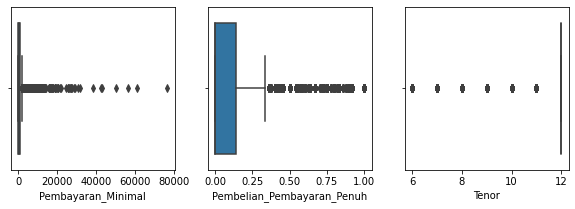

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(131) #1 = jumlah baris dlm 1 kanvas, #2= jumlah kolom dalam 1 kanvas, #1 = urutan tampilan
sns.boxplot(credit_card_data['Pembayaran_Minimal'])
plt.subplot(132)
sns.boxplot(credit_card_data['Pembelian_Pembayaran_Penuh'])
plt.subplot(133)
sns.boxplot(credit_card_data['Tenor'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


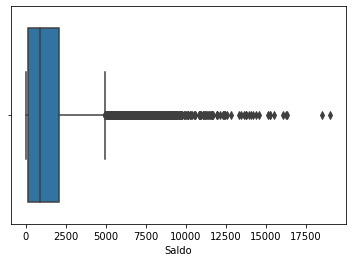

In [ ]:
sns.boxplot(credit_card_data['Saldo'])

In [ ]:
credit_card_data['Batas_Kredit'].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: Batas_Kredit, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


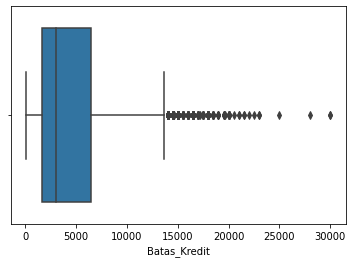

In [ ]:
sns.boxplot(credit_card_data['Batas_Kredit'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ed3e6a290>,
      dtype=object)

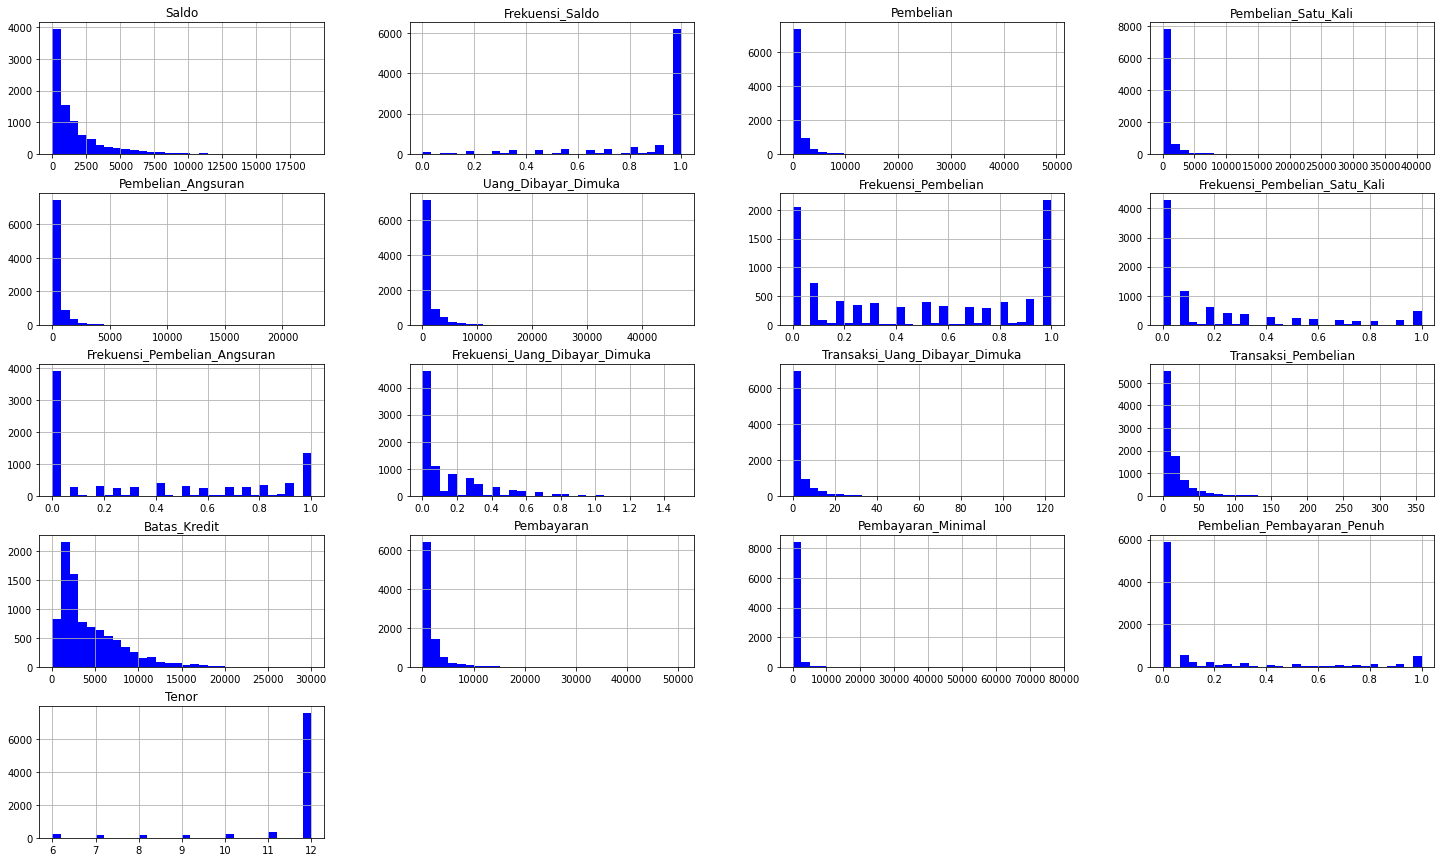

In [ ]:
credit_card_data.hist(bins = 30, figsize= (25, 15), color = 'b')

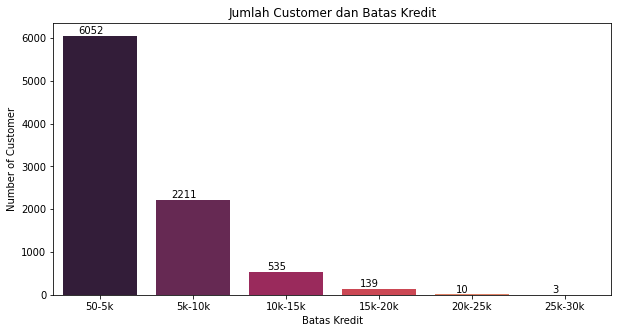

In [33]:
kredit50_5k = credit_card_data[(credit_card_data['Batas_Kredit']>=50) & (credit_card_data['Batas_Kredit']<=5000)]
kredit5k_10k = credit_card_data[(credit_card_data['Batas_Kredit']>=5001) & (credit_card_data['Batas_Kredit']<=10000)]
kredit10k_15k = credit_card_data[(credit_card_data['Batas_Kredit']>=10001) & (credit_card_data['Batas_Kredit']<=15000)]
kredit15k_20k = credit_card_data[(credit_card_data['Batas_Kredit']>=15001) & (credit_card_data['Batas_Kredit']<=20000)]
kredit20k_25k = credit_card_data[(credit_card_data['Batas_Kredit']>=20001) & (credit_card_data['Batas_Kredit']<=25000)]
kredit25k_30k = credit_card_data[(credit_card_data['Batas_Kredit']>=25001) & (credit_card_data['Batas_Kredit']<=30000)]


x = ["50-5k","5k-10k","10k-15k","15k-20k","20k-25k","25k-30k"]
y = [len(kredit50_5k.values),len(kredit5k_10k.values),len(kredit10k_15k.values),len(kredit15k_20k.values),len(kredit20k_25k.values),len(kredit25k_30k.values)]

plt.figure(figsize=(10,5))
graph = sns.barplot(x=x, y=y, palette="rocket")
plt.title("Jumlah Customer dan Batas Kredit")
plt.xlabel("Batas Kredit")
plt.ylabel("Number of Customer")


for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

plt.show()

#### DATA PRE-PROCESSING

# Memeriksa Missing Value

Dikeathui ada 2 feature yang mempunyai missing value, yaitu Batas_Kredit = 1, dan Pembayaran Minimal = 313

In [7]:

credit_card_data.isnull().sum()

Cust_ID                            0
Saldo                              0
Frekuensi_Saldo                    0
Pembelian                          0
Pembelian_Satu_Kali                0
Pembelian_Angsuran                 0
Uang_Dibayar_Dimuka                0
Frekuensi_Pembelian                0
Frekuensi_Pembelian_Satu_Kali      0
Frekuensi_Pembelian_Angsuran       0
Frekuensi_Uang_Dibayar_Dimuka      0
Transaksi_Uang_Dibayar_Dimuka      0
Transaksi_Pembelian                0
Batas_Kredit                       1
Pembayaran                         0
Pembayaran_Minimal               313
Pembelian_Pembayaran_Penuh         0
Tenor                              0
dtype: int64

Mengisi Missing Value dengan Mean

In [8]:
 credit_card_data['Batas_Kredit'] = credit_card_data['Batas_Kredit'].fillna(credit_card_data['Batas_Kredit'].mean())
 credit_card_data['Pembayaran_Minimal'] = credit_card_data['Pembayaran_Minimal'].fillna(credit_card_data['Pembayaran_Minimal'].mean())

In [ ]:
# cek missing value
credit_card_data.isnull().sum()

Cust_ID                          0
Saldo                            0
Frekuensi_Saldo                  0
Pembelian                        0
Pembelian_Satu_Kali              0
Pembelian_Angsuran               0
Uang_Dibayar_Dimuka              0
Frekuensi_Pembelian              0
Frekuensi_Pembelian_Satu_Kali    0
Frekuensi_Pembelian_Angsuran     0
Frekuensi_Uang_Dibayar_Dimuka    0
Transaksi_Uang_Dibayar_Dimuka    0
Transaksi_Pembelian              0
Batas_Kredit                     0
Pembayaran                       0
Pembayaran_Minimal               0
Pembelian_Pembayaran_Penuh       0
Tenor                            0
dtype: int64

In [9]:
# Cek duplicate
# tidak ada data yang duplicate
duplicate = credit_card_data[credit_card_data.duplicated()]
duplicate

,Cust_ID,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor


In [ ]:
credit_card_data.head()

,Cust_ID,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**SCALING**


Scala semua feature tidak sama, ada yang berskala 0-1 ada juga yang nilainya  sampai puluhan ribu. Karena itu perlu dilakukan Scaling terhadap feature-feature yang skalanya bukan 0-1





In [ ]:
credit_card_data.describe()

,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Agar range data menjadi sama antara 0-1, maka feature yang nilainya tidak di range 0-1, harus discaled dulu


In [11]:
credit_card_data_scaled = copy.deepcopy(credit_card_data)

scaler = MinMaxScaler()

credit_card_data_scaled[['Saldo', 'Pembelian']] = scaler.fit_transform(credit_card_data_scaled[['Saldo', 'Pembelian']])
credit_card_data_scaled[['Pembelian_Satu_Kali', 'Pembelian_Angsuran']] = scaler.fit_transform(credit_card_data_scaled[['Pembelian_Satu_Kali', 'Pembelian_Angsuran']])
credit_card_data_scaled[['Uang_Dibayar_Dimuka', 'Batas_Kredit']] = scaler.fit_transform(credit_card_data_scaled[['Uang_Dibayar_Dimuka', 'Batas_Kredit']])
credit_card_data_scaled[['Pembayaran', 'Pembayaran_Minimal']] = scaler.fit_transform(credit_card_data_scaled[['Pembayaran', 'Pembayaran_Minimal']])
credit_card_data_scaled[['Frekuensi_Uang_Dibayar_Dimuka', 'Transaksi_Uang_Dibayar_Dimuka', 'Transaksi_Pembelian', 'Tenor']] = scaler.fit_transform(credit_card_data_scaled[['Frekuensi_Uang_Dibayar_Dimuka', 'Transaksi_Uang_Dibayar_Dimuka', 'Transaksi_Pembelian', 'Tenor']])

credit_card_data_scaled.head()

,Cust_ID,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor
0,C10001,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,C10002,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,C10003,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,C10004,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,C10005,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


Kita cek kembali apakah semua feature skala nya sudah sesuai dari 0-1

In [ ]:
credit_card_data_scaled.describe()

,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.082154,0.877271,0.020457,0.014534,0.018270,0.020766,0.490351,0.202458,0.364437,0.090096,0.026413,0.041089,0.148396,0.034170,0.011310,0.153715,0.919553
std,0.109306,0.236904,0.043570,0.040722,0.040193,0.044491,0.401371,0.298336,0.397448,0.133414,0.055485,0.069435,0.121490,0.057078,0.030503,0.292499,0.223055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006736,0.888889,0.000808,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.002793,0.051753,0.007556,0.002236,0.000000,1.000000
50%,0.045864,1.000000,0.007367,0.000932,0.003956,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,0.019553,0.098497,0.016894,0.004392,0.000000,1.000000
75%,0.107868,1.000000,0.022637,0.014166,0.020828,0.023629,0.916667,0.300000,0.750000,0.148148,0.032520,0.047486,0.215359,0.037482,0.011310,0.142857,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Kita Drop Feature Cust_ID karena feature ini tidak signifikan 

In [12]:
credit_card_data_scaled.drop('Cust_ID', axis = 1, inplace = True)
credit_card_data_scaled.head()

,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


### KORELASI

Memeriksa korelasi antar feature dengan heatmap

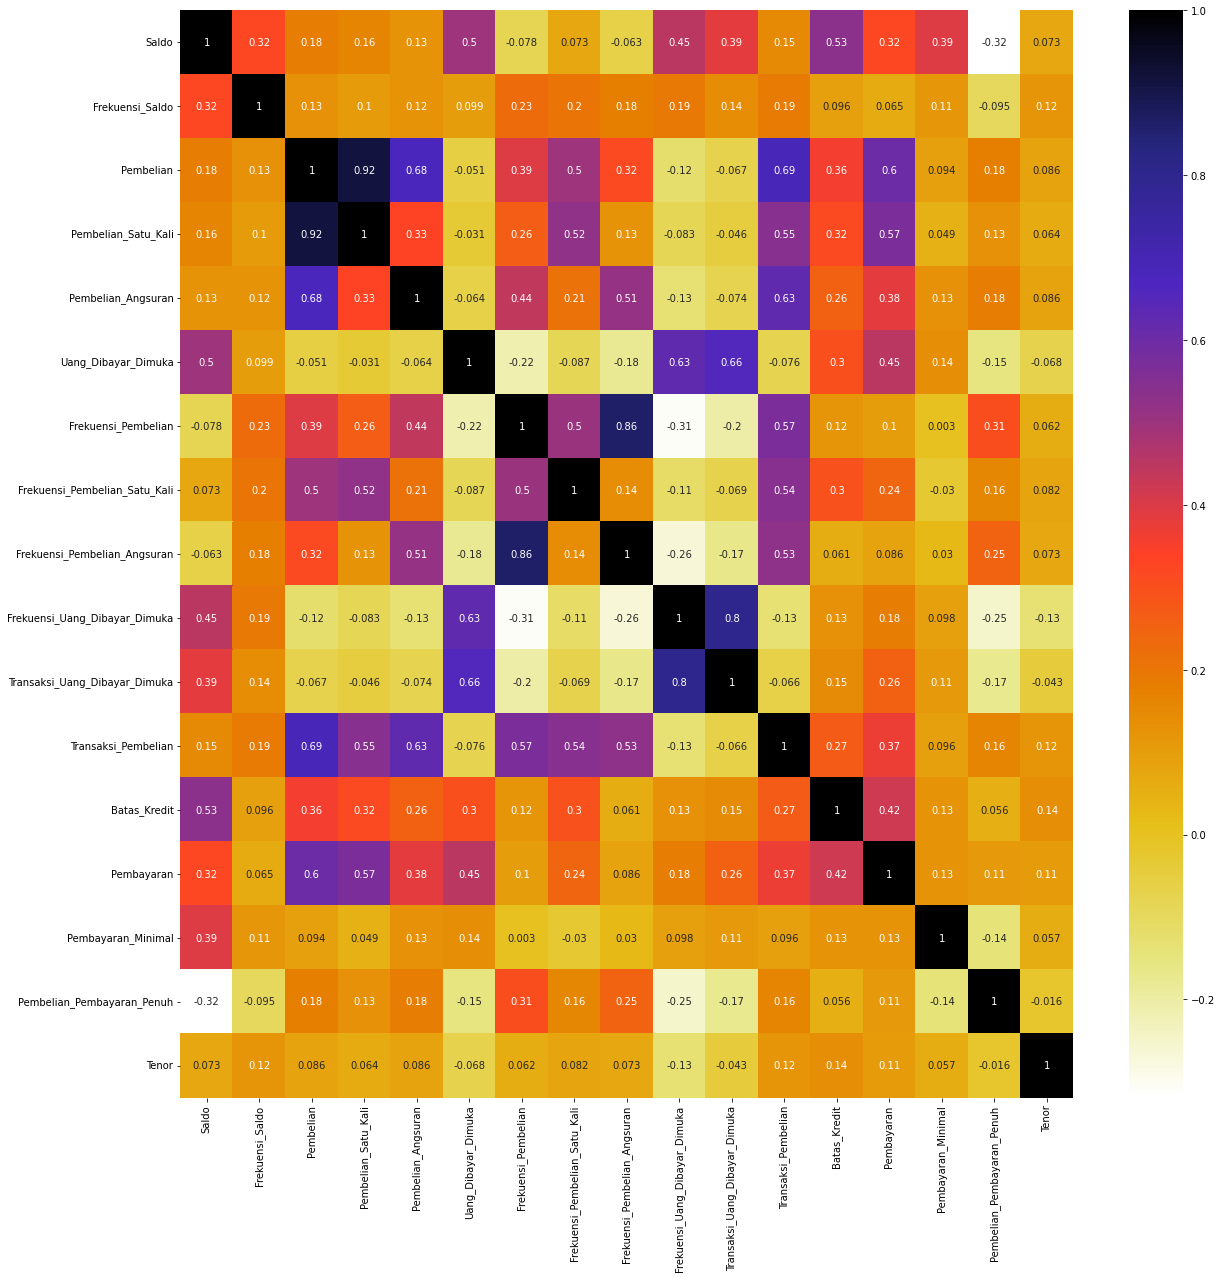

In [13]:
correlations = credit_card_data_scaled.corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, cmap = plt.cm.CMRmap_r, annot = True)

#### FEATURE ENGINEERING

Function untuk mendapatkan feature - feature yang nilai correlation valuenya melebihi nilai threshold. Dan kita akan drop salah satu feature tersebut

In [14]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [15]:
corr_features = correlation(credit_card_data_scaled, 0.75)
corr_features

{'Frekuensi_Pembelian_Angsuran',
 'Pembelian_Satu_Kali',
 'Transaksi_Uang_Dibayar_Dimuka'}

In [16]:
# Drop variabel yang memenuhi nilai korelasi > 0.75
cluster_data = credit_card_data_scaled.drop(corr_features, axis = 1)
cluster_data.head()

,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor
0,0.002148,0.818182,0.001945,0.00424,0.000000,0.166667,0.000000,0.000000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.00000,0.136685,0.000000,0.000000,0.166667,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.00000,0.000000,1.000000,1.000000,0.000000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.00000,0.004366,0.083333,0.083333,0.055555,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,0.042940,1.000000,0.000326,0.00000,0.000000,0.083333,0.083333,0.000000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


#### MODELING

Mencari nilai K dengan Metode Elbow

In [17]:
# Perulangan ini digunakan untuk mengeksekusi nilai k dengan data 
# Selanjutkan akan dicari SSE
cluster_data = credit_card_data_scaled
Sum_of_squared_error = []
K = range(2,10) #dari 2 - 10, yang mana yang paling optimal
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_data)
    Sum_of_squared_error.append(km.inertia_)

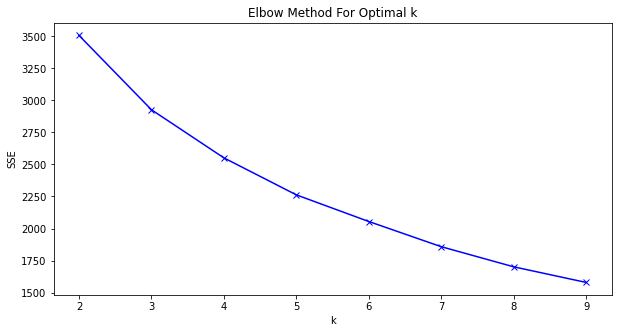

In [20]:
plt.figure(figsize=(10,5))
ax = plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')

#for a,b in zip(K, Sum_of_squared_error): 
    #plt.text(a, b, str(b))
plt.show()

Mencari nilai K dengan metode silhouette score

In [21]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(cluster_data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(cluster_data, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.38672161289328333
For n_clusters = 3, silhouette score is 0.37239801886455637
For n_clusters = 4, silhouette score is 0.3215079773343314
For n_clusters = 5, silhouette score is 0.31523235915168696
For n_clusters = 6, silhouette score is 0.33423666981136463
For n_clusters = 7, silhouette score is 0.3374009877234517
For n_clusters = 8, silhouette score is 0.32444286828635555
For n_clusters = 9, silhouette score is 0.3343573891747393


Silhouette score tertinggi k=2 dengan 0.38672161289328333, tetapi cluster nya terlalu sedikit untuk menganalisa customer kartu kredit. karena itu digunakan silhouette score tertinggi ke 2, yaitu k=3 dengan Silhouette score = 0.37239801886455637


In [22]:
# Memodelkan data dengan k-means
cluster = KMeans(n_clusters=3)
cluster.fit(cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
# Membuat kolom baru berdasarkan hasil clustering
segment = pd.Series(cluster.labels_, name="segment")

In [24]:
# Menggabungkan data dengan hasil cluster
results = pd.concat([credit_card_data, segment], axis=1)
results.head()

,Cust_ID,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor,segment
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
# Menampilkan 5 data teratas dari cluster 0
results[results["segment"]==0][:5]

,Cust_ID,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor,segment
5,C10006,1809.828751,1.0,1333.28,0.00,1333.28,0.0,0.666667,0.000000,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
7,C10008,1823.652743,1.0,436.20,0.00,436.20,0.0,1.000000,0.000000,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.000000,12,0
10,C10011,1293.124939,1.0,920.12,0.00,920.12,0.0,1.000000,0.000000,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.000000,12,0
12,C10013,1516.928620,1.0,3217.99,2500.23,717.76,0.0,1.000000,0.250000,0.916667,0.0,0,26,3000.0,608.263689,490.207013,0.250000,12,0
13,C10014,921.693369,1.0,2137.93,419.96,1717.97,0.0,0.750000,0.166667,0.750000,0.0,0,26,7500.0,1655.891435,251.137986,0.083333,12,0


In [ ]:
# Menampilkan 5 data teratas dari cluster 1
results[results["segment"]==1][:5]

,Cust_ID,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor,segment
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
8,C10009,1014.926473,1.000000,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,1


In [ ]:
# Menampilkan 5 data teratas dari cluster 2
results[results["segment"]==2][:5]

,Cust_ID,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor,segment
2,C10003,2495.148862,1.0,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.00,0.000000,0,12,7500.0,622.066742,627.284787,0.0,12,2
6,C10007,627.260806,1.0,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.00,0.000000,0,64,13500.0,6354.314328,198.065894,1.0,12,2
21,C10022,6369.531318,1.0,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.00,0.333333,6,92,11250.0,2077.959051,1659.775075,0.0,12,2
33,C10034,125.660453,1.0,636.79,636.79,0.00,0.000000,0.916667,0.916667,0.00,0.000000,0,11,1200.0,423.449696,196.301885,0.3,12,2
37,C10038,4047.480828,1.0,2380.55,1642.17,738.38,1697.660901,0.750000,0.500000,0.75,0.333333,7,41,5000.0,1617.894416,1541.141605,0.0,12,2


### EDA

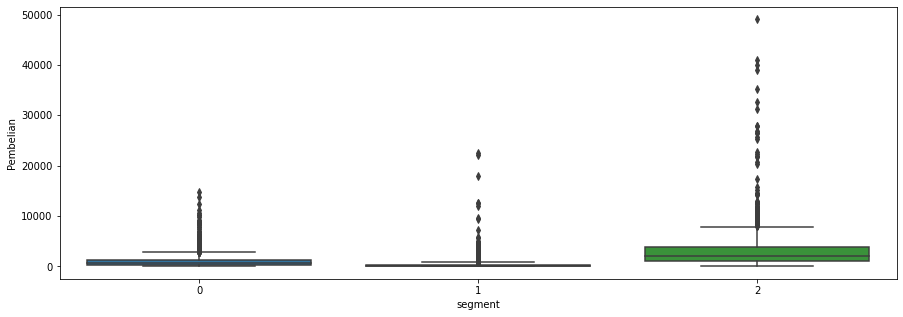

In [ ]:
# Pengelompokan customer berdasarkan usia
plt.figure(figsize=(15,5))
sns.boxplot(x=results["segment"], y=results["Pembelian"], data=results)

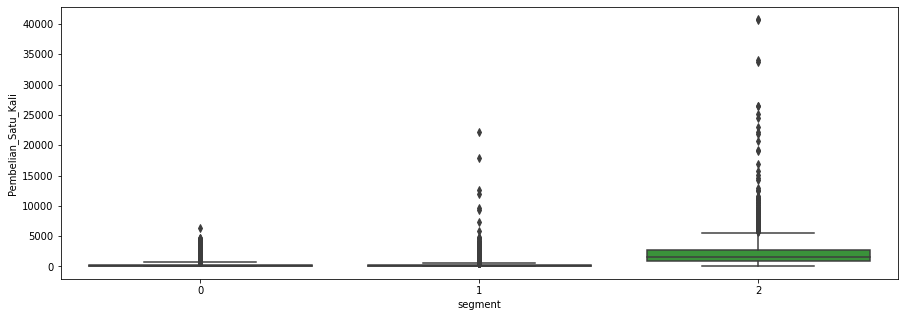

In [ ]:
# Pengelompokan customer berdasarkan usia
plt.figure(figsize=(15,5))
sns.boxplot(x=results["segment"], y=results["Pembelian_Satu_Kali"], data=results)

In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cust_ID                        8950 non-null   object 
 1   Saldo                          8950 non-null   float64
 2   Frekuensi_Saldo                8950 non-null   float64
 3   Pembelian                      8950 non-null   float64
 4   Pembelian_Satu_Kali            8950 non-null   float64
 5   Pembelian_Angsuran             8950 non-null   float64
 6   Uang_Dibayar_Dimuka            8950 non-null   float64
 7   Frekuensi_Pembelian            8950 non-null   float64
 8   Frekuensi_Pembelian_Satu_Kali  8950 non-null   float64
 9   Frekuensi_Pembelian_Angsuran   8950 non-null   float64
 10  Frekuensi_Uang_Dibayar_Dimuka  8950 non-null   float64
 11  Transaksi_Uang_Dibayar_Dimuka  8950 non-null   int64  
 12  Transaksi_Pembelian            8950 non-null   i

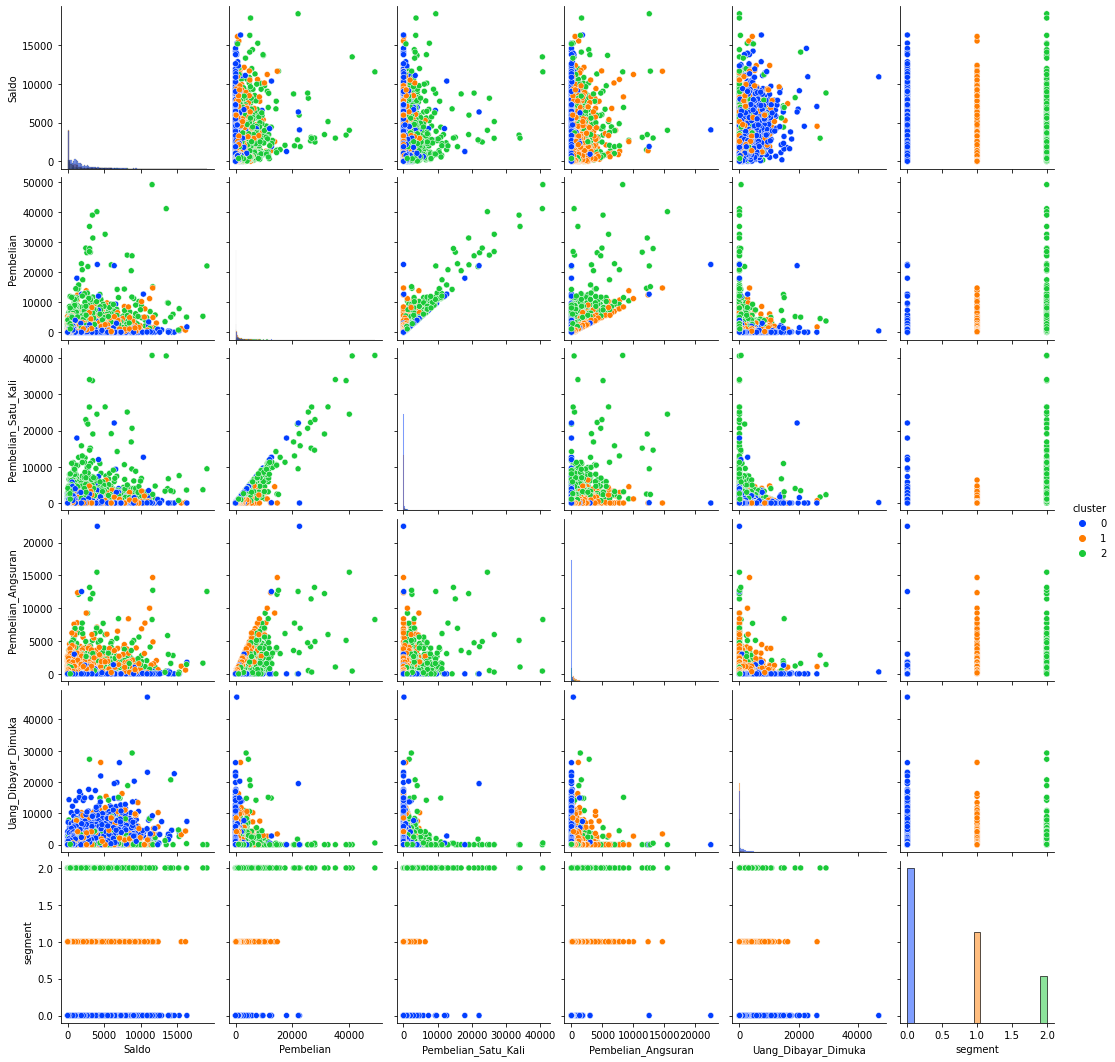

In [25]:
best_cols = ["Saldo", "Pembelian", "Pembelian_Satu_Kali", "Pembelian_Angsuran", "Uang_Dibayar_Dimuka", "segment"]
results["cluster"] = segment
best_cols.append("cluster")

sns.pairplot(results[best_cols], hue='cluster', diag_kind="hist", palette="bright")

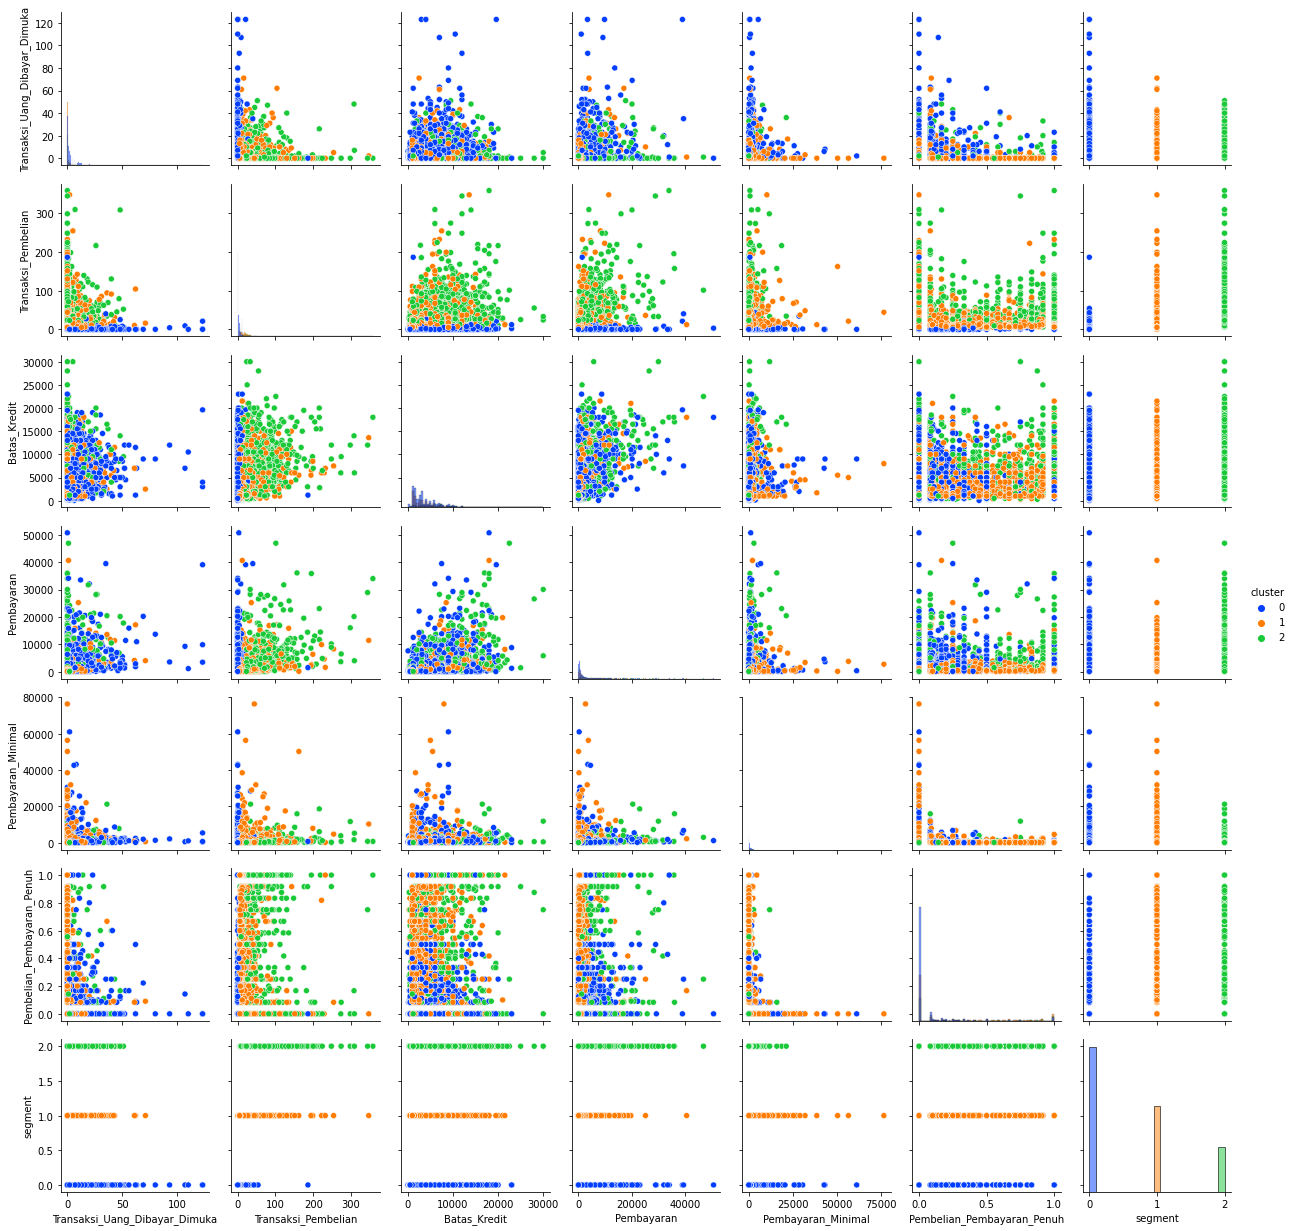

In [26]:
best_cols = [ "Transaksi_Uang_Dibayar_Dimuka", "Transaksi_Pembelian", "Batas_Kredit", "Pembayaran", "Pembayaran_Minimal", "Pembelian_Pembayaran_Penuh","segment"]
results["cluster"] = segment
best_cols.append("cluster")

sns.pairplot(results[best_cols], hue='cluster', diag_kind="hist", palette="bright")

In [29]:
results.groupby("segment")['Saldo'].describe()

,count,mean,std,min,25%,50%,75%,max
segment,,,,,,,,
0,4724.0,1704.937983,2059.302589,0.0,199.334483,1082.054640,2281.140996,16304.88925
1,2782.0,1139.528315,1810.152560,0.0,58.376638,339.761493,1412.701811,16115.59640
2,1444.0,1923.652980,2476.614610,0.0,279.919957,925.314895,2620.806525,19043.13856


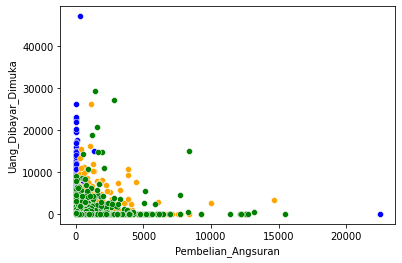

In [31]:
# Plot customer berdasarkan usia dengan menggunakan scatter plot
sns.scatterplot(x=results[results["segment"]==0].Pembelian_Angsuran, y=results[results["segment"]==0].Uang_Dibayar_Dimuka, color="blue")
sns.scatterplot(x=results[results["segment"]==1].Pembelian_Angsuran, y=results[results["segment"]==1].Uang_Dibayar_Dimuka, color="orange")
sns.scatterplot(x=results[results["segment"]==2].Pembelian_Angsuran, y=results[results["segment"]==2].Uang_Dibayar_Dimuka, color="green")


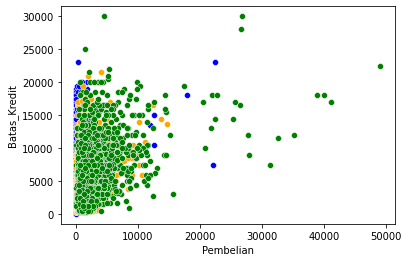

In [32]:
sns.scatterplot(x=results[results["segment"]==0].Pembelian, y=results[results["segment"]==0].Batas_Kredit, color="blue")
sns.scatterplot(x=results[results["segment"]==1].Pembelian, y=results[results["segment"]==1].Batas_Kredit, color="orange")
sns.scatterplot(x=results[results["segment"]==2].Pembelian, y=results[results["segment"]==2].Batas_Kredit, color="green")

 CLUSTER ANALYSIS

 **Cluster 0**


*   Total ada 2.782 Customer
*   Nilai pembeliannya paling Kecil
*   Nilai pembelian satu kali paling kecil
*   Penarikan uang dibayar dimuka paling kecil
*   Paling banyak Pembayaran Minimal dengan jumlah besar
*   Sering melakukan Pembelian dengan Pembayaran dengan Penuh


**Cluster 1**



*   Total ada 2.782 Customer
*   Nilai pembeliannya paling Kecil
*   Nilai pembelian satu kali paling kecil
*   Penarikan uang dibayar dimuka paling kecil
*   Paling banyak Pembayaran Minimal dengan jumlah besar
*   Sering melakukan Pembelian dengan Pembayaran dengan Penuh


**Cluster 2**


*   Cluster terkecil ada 1.444 Customer
*   Nilai pembeliannya paling besar
*   Nilai pembelian satu kali paling besar
*   Batas Kredit Terbesar
*   Paling sedikit melakukan pembayaran minimal
*   Sering melakukan pembayaran Penuh



### KESIMPULAN/SARAN

**Cluster 0**


*   Cluster yang menggunakan Kartu kredit hanya pada saat urgent
*   Menggunakan kartu kredit untuk dana cadangan
*   Customer di cluster ini keuangannya menengah kebawah
*   Selalu monitor pembayaran dan review kembali permintaan untuk meingkatkan batas kredit


**Cluster 1**


*   Cluster yang mempunyai potensi untuk dikembangkan menjadi Prime Customer
*   Diberikan service / free gift agar customer makin sering menggunakan kartu kredit
*   Berikan kenaikan batas kredit, sesuai dengan history pembayaran customer
*   Customer resiko rendah


**Cluster 2**


*   Cluster ini adalah Prime Customer / VIP
*   Harus diberikan service yang excellent terhadap customer
*   Peningkatan Batas Kredit
*   Diberikan fasilitas tambahan seperti nasabah prioritas, voucher, lounge, hadiah saat ulang tahun / hari raya





